In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

pd.set_option('max_columns', 60)

In [6]:
df = pd.read_csv('chiefs_data_clean.csv')

del[df['game_time']]


<AxesSubplot:>

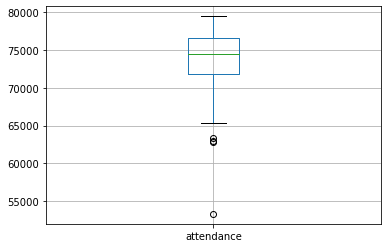

In [7]:
df.boxplot('attendance')

<AxesSubplot:>

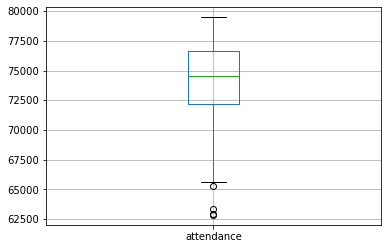

In [8]:
#take out big outlier

df = df[df['attendance'] > 55000]

df.boxplot('attendance')

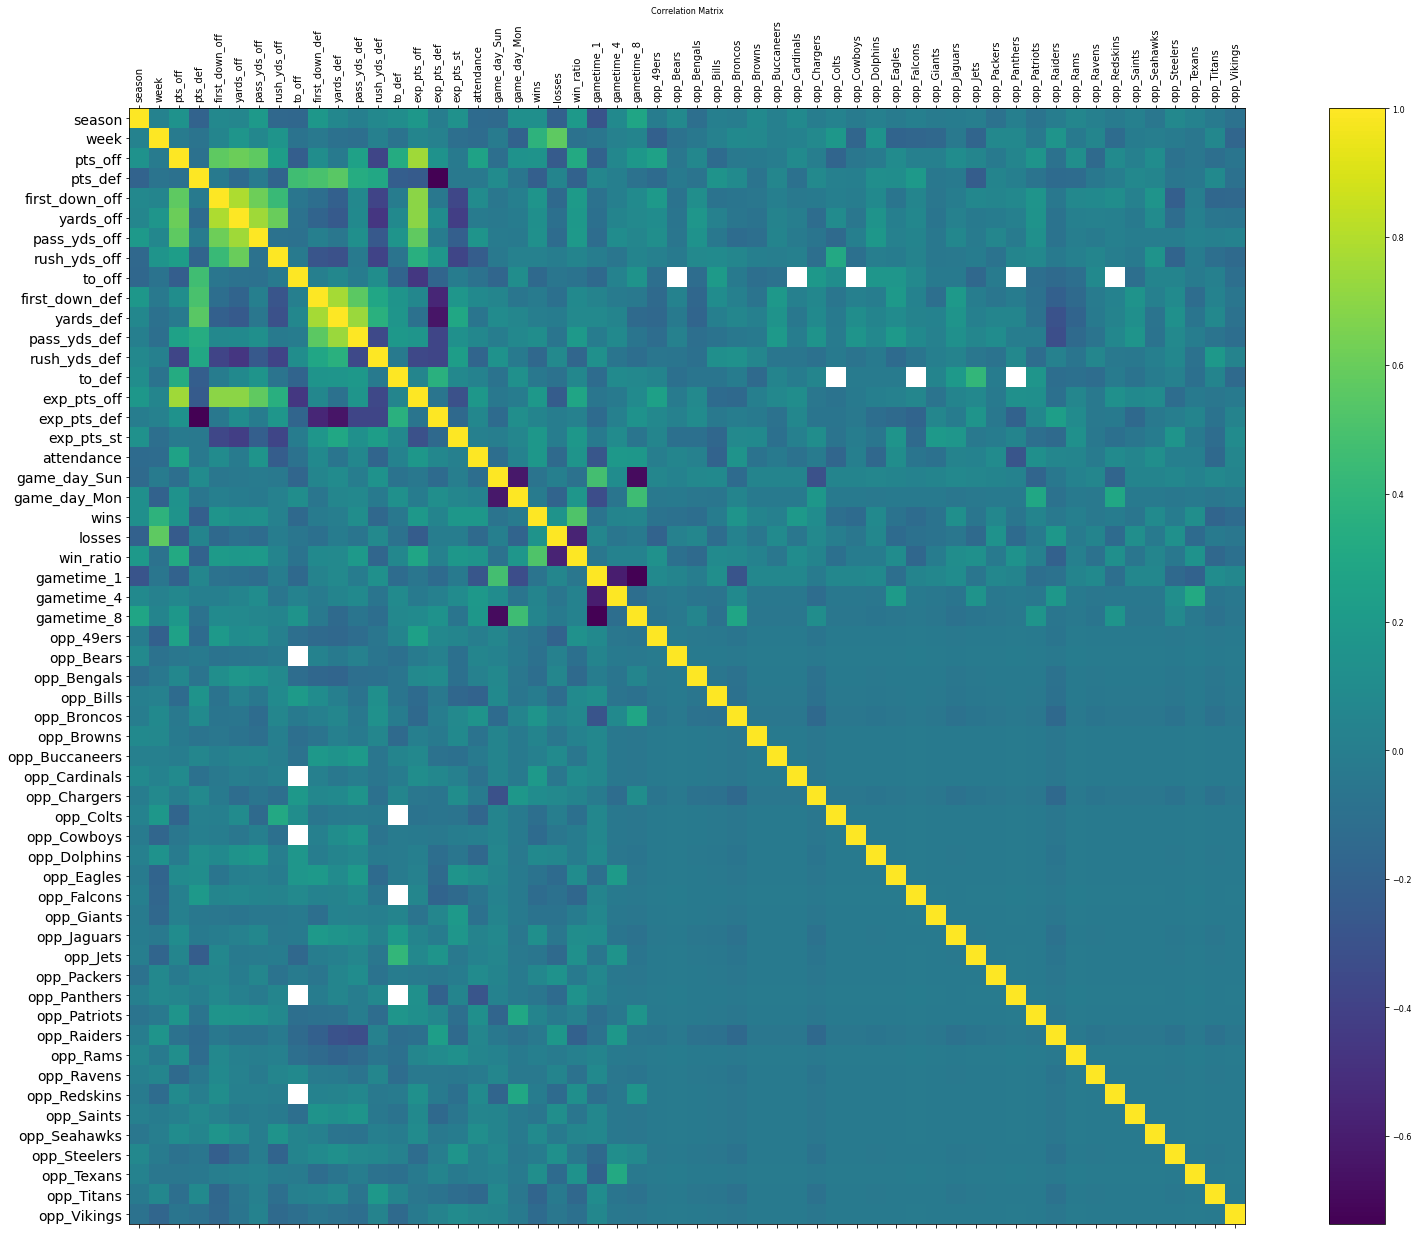

In [9]:
f = plt.figure(figsize=(30, 20))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=8);

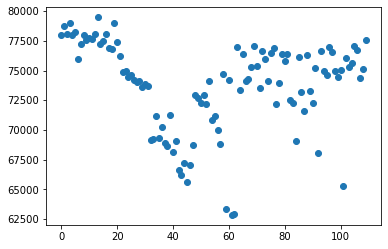

In [11]:
plt.scatter(range(len(df)), df['attendance'])
plt.show()

In [12]:
#take out to_off and to_def

del[df['to_off'], 
   df['to_def']]

In [13]:
#change around order of dataframe so attendance is to the front

target = ['attendance']
predictors = []

for x in list(df.columns):
  if x not in target:
    predictors.append(x)


In [27]:
#preform train_test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
df[predictors], df[target], test_size = .2, random_state = 123
)

x_test = pd.DataFrame(x_test, columns = list(df[predictors].columns))
x_train = pd.DataFrame(x_train, columns = list(df[predictors].columns))

In [28]:
print(y_train.mean() / y_test.mean() - 1)

attendance    0.000241
dtype: float64


In [29]:
x_test.shape

(22, 53)

In [30]:
#model to beat: Average of attendance

aa = []
for x in df['attendance']:
  aa.append(df['attendance'].mean())
  
np.sqrt(mean_squared_error(df['attendance'], aa))

3778.064196086677

In [31]:
from sklearn.linear_model import LassoLars

mod = LassoLars(alpha = 5)

mod_fit = mod.fit(x_train, y_train)

mod_predict = mod.predict(x_test)

print('RMSE =', np.sqrt(mean_squared_error(y_test, mod_predict)))
print('R2 score = ', r2_score(y_test,mod_predict))

RMSE = 3765.3434831401773
R2 score =  0.22218652928441684


In [32]:
params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10,12,14,16,20]}

clf = GridSearchCV(estimator = mod, cv = 7, param_grid = params, 
             scoring = 'r2')

clf_fit = clf.fit(x_train, y_train)

In [33]:
print(clf_fit.best_params_)

{'alpha': 20}


In [34]:
coefs = pd.DataFrame(mod_fit.coef_).transpose()

coefs.columns = list(x_train.columns)

coefs = coefs.transpose().reset_index()

coefs.columns = ['colum','coefficient']

coefs['absolute'] = abs(coefs['coefficient'])

coefs.sort_values('absolute', ascending = False)

,colum,coefficient,absolute
41,opp_Panthers,-11063.332307,11063.332307
50,opp_Texans,-3912.347443,3912.347443
24,opp_Bears,3591.804146,3591.804146
30,opp_Cardinals,-3434.750122,3434.750122
40,opp_Packers,2882.200289,2882.200289
20,gametime_1,-2638.219861,2638.219861
23,opp_49ers,-2611.731753,2611.731753
42,opp_Patriots,2419.354214,2419.354214
48,opp_Seahawks,2349.422292,2349.422292
34,opp_Dolphins,-2338.523481,2338.523481


In [35]:
from sklearn.model_selection import cross_validate

mod_select = cross_validate(mod_fit, x_test, y_test, 
                            cv = 7, scoring = ('neg_mean_squared_error'))

mod_select.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [36]:
#run a gridsearch

from sklearn.model_selection import GridSearchCV

params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10]}

GridSearchCV(estimator = mod_fit, cv = 7, param_grid = params, 
             scoring = 'neg_mean_squared_error')



GridSearchCV(cv=7, estimator=LassoLars(alpha=5),
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [37]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha = 0.8, normalize = True)


ridge_fit = ridge.fit(x_train, y_train)

ridge_predict = ridge_fit.predict(x_test)

print('RMSE =', np.sqrt(mean_squared_error(y_test, ridge_predict)))

mean_list = []
for row in range(len(y_test)) :
    mean_list.append(df['attendance'].mean())

print("mean", np.sqrt(mean_squared_error(y_test, mean_list)))

mean_rmse = np.sqrt(mean_squared_error(y_test, mean_list))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predict))

improvement = ((mean_rmse / ridge_rmse) - 1) * 100
print("delta:", improvement)
print("R Squarred of Ridge Regression:", r2_score(y_test, ridge_predict))

RMSE = 3723.1809495526472
mean 4269.423969275186
delta: 14.671406711730505
R Squarred of Ridge Regression: 0.23950817741721864


In [38]:
params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10]}

clf = GridSearchCV(estimator = ridge, cv = 7, param_grid = params, 
             scoring = 'neg_mean_squared_error')

clf_fit = clf.fit(x_train, y_train)

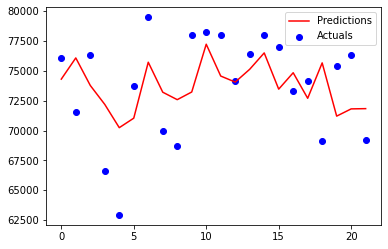

In [39]:
plt.scatter(range(len(y_test)), y_test, color = 'blue', label = "Actuals")
plt.plot(range(len(y_test)), ridge_predict, color = 'red', label = "Predictions")
plt.legend()


In [26]:
print(clf_fit.best_params_)


{'alpha': 0.8}


Results:

It looks like we are getting some lift in the model. If we use the attendance mean as a benchmark, the ridge model had an 8% RMSE improvement. R^2 was fairly low at .14, so there might be different models to try. I am interested in working with tensorflow regression models to see if I can increase r^2.

There is a big outlier at 55,000. Will taking this out improve proformance?
 UPDATE:
 Taking out the outlier below 55,000 on attendance did have a positive effect on the model. we improved our delta from our benchmark up to 14.7 percent. R^2 also went up to 22%

 Since there aren't many datapoints in this analysis, there is no surprise that taking out the low outlier had a dramatic effect on the model performance. 
 